<a href="https://colab.research.google.com/github/Tanushreep698/OIBSIP/blob/main/level2project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

# Assume column 'Amount' contains transaction amount
print(df['Amount'].head())

Saving creditcard.csv to creditcard (2).csv
0    149.62
1      2.69
2    378.66
3    123.50
4     69.99
Name: Amount, dtype: float64


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['cleaned'] = df['text'].apply(clean_text)
df['tokens'] = df['cleaned'].apply(word_tokenize)


KeyError: 'text'

In [ ]:
# Build bigrams and trigrams
all_tokens = [token for sublist in df['tokens'] for token in sublist]
bigrams = list(ngrams(all_tokens, 2))
trigrams = list(ngrams(all_tokens, 3))

bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

# Autocomplete function
def autocomplete(prefix):
    prefix = prefix.lower().split()
    if len(prefix) == 1:
        suggestions = {k[1]: v for k, v in bigram_freq.items() if k[0] == prefix[0]}
    elif len(prefix) == 2:
        suggestions = {k[2]: v for k, v in trigram_freq.items() if k[0] == prefix[0] and k[1] == prefix[1]}
    else:
        return "Too long prefix"
    return sorted(suggestions.items(), key=lambda x: x[1], reverse=True)[:5]

# Example
print("Autocomplete suggestions for 'data':", autocomplete("data"))


KeyError: 'tokens'

# Task
Analyze the provided credit card transaction dataset to identify patterns and potential indicators of fraudulent transactions.

## Explore the distribution of transaction amounts

### Subtask:
Visualize the distribution of the 'Amount' column using a histogram or box plot.


**Reasoning**:
Create a histogram and a box plot to visualize the distribution of the 'Amount' column as requested in the instructions.



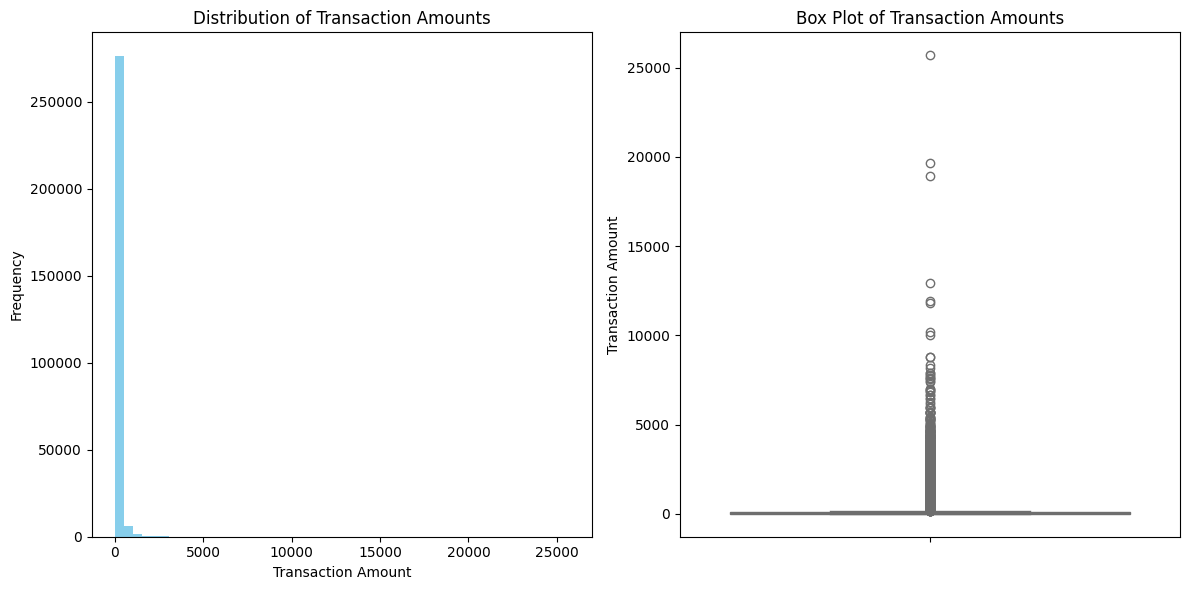

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Amount'], bins=50, color='skyblue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Amount'], color='lightcoral')
plt.title('Box Plot of Transaction Amounts')
plt.ylabel('Transaction Amount')

plt.tight_layout()
plt.show()

## Analyze transactions over time

### Subtask:
Plot the number of transactions or the total transaction amount over time.


**Reasoning**:
Convert the 'Time' column to datetime, group by time, and plot the number of transactions over time.



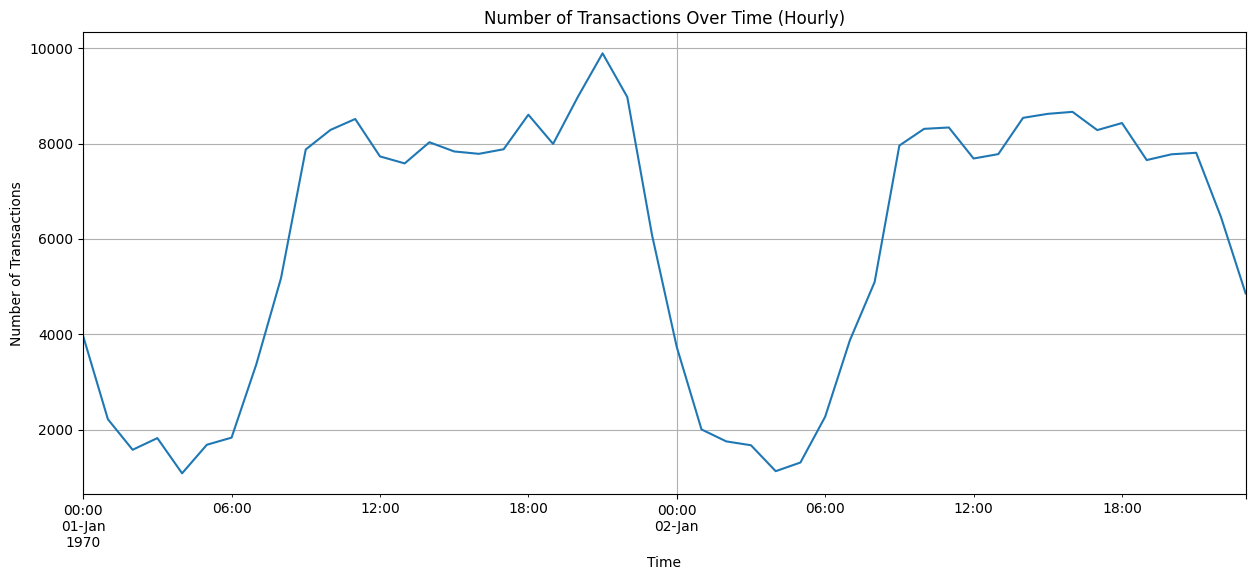

In [ ]:
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df['Time_hour'] = df['Time'].dt.floor('h')
transactions_by_hour = df.groupby('Time_hour').size()

plt.figure(figsize=(15, 6))
transactions_by_hour.plot(kind='line')
plt.title('Number of Transactions Over Time (Hourly)')
plt.xlabel('Time')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

## Investigate potential fraud indicators

### Subtask:
Analyze the relationship between the 'Class' column and other features, potentially using visualizations or summary statistics. Note that the 'Class' column represents whether a transaction is fraudulent, but this type of dataset is often highly imbalanced, which needs to be considered in the analysis.


**Reasoning**:
Calculate the proportion of fraudulent transactions and select features for analysis. Then, create visualizations and calculate summary statistics to compare fraudulent and non-fraudulent transactions.



Proportion of fraudulent transactions:
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


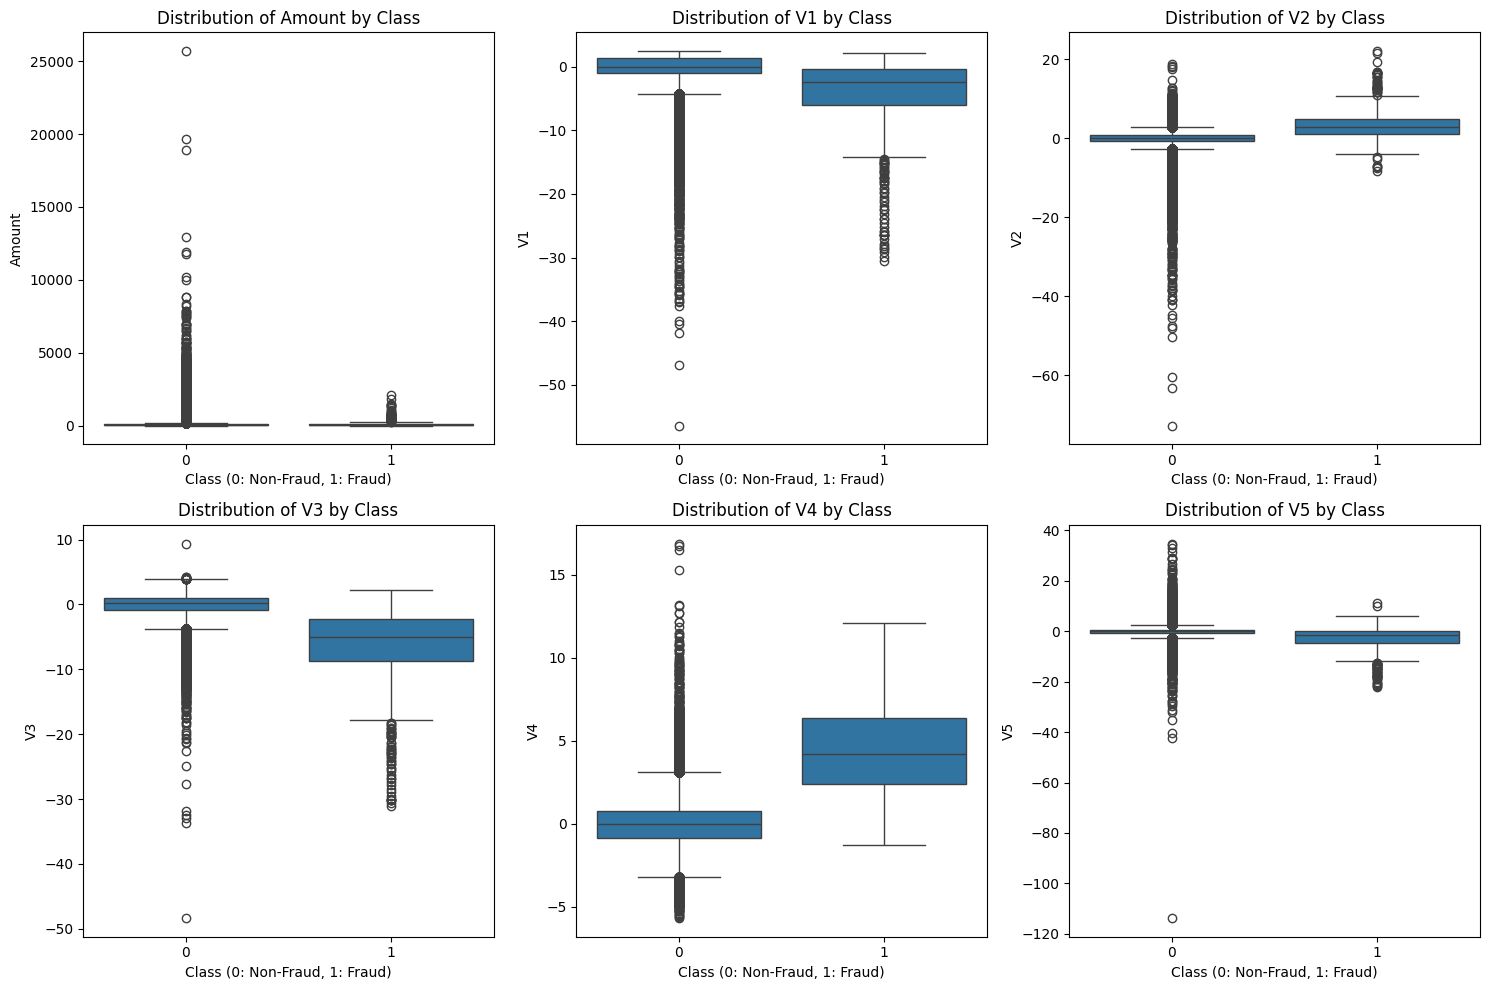


Summary statistics of selected features by Class:


Amount                           V1                            V2  \
             mean median         std      mean    median       std      mean   
Class                                                                          
0       88.291022  22.00  250.105092  0.008258  0.020023  1.929814 -0.006271   
1      122.211321   9.25  256.683288 -4.771948 -2.342497  6.783687  3.623778   

                                 V3                            V4            \
         median       std      mean    median       std      mean    median   
Class                                                                         
0      0.064070  1.636146  0.012171  0.182158  1.459429 -0.007860 -0.022405   
1      2.717869  4.291216 -7.033281 -5.075257  7.110937  4.542029  4.177147   

                       V5                      
            std      mean    median       std  
Class                                          
0      1.399333  0.005453 -0.053457  1.356952  
1      2.873318 -3.151225 -1.522962  5.372468

In [ ]:
# 1. Calculate the proportion of fraudulent transactions
fraud_proportion = df['Class'].value_counts(normalize=True)
print("Proportion of fraudulent transactions:")
print(fraud_proportion)

# 2. Select features for analysis
selected_features = ['Amount', 'V1', 'V2', 'V3', 'V4', 'V5']

# 3. Create visualizations (box plots)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# 4. Calculate summary statistics
summary_stats = df.groupby('Class')[selected_features].agg(['mean', 'median', 'std'])
print("\nSummary statistics of selected features by Class:")
display(summary_stats)

## Feature correlation

### Subtask:
Compute and visualize the correlation matrix of the features, including the 'V' columns and 'Amount'.


**Reasoning**:
Select the relevant columns, compute the correlation matrix, and generate a heatmap to visualize the correlations.



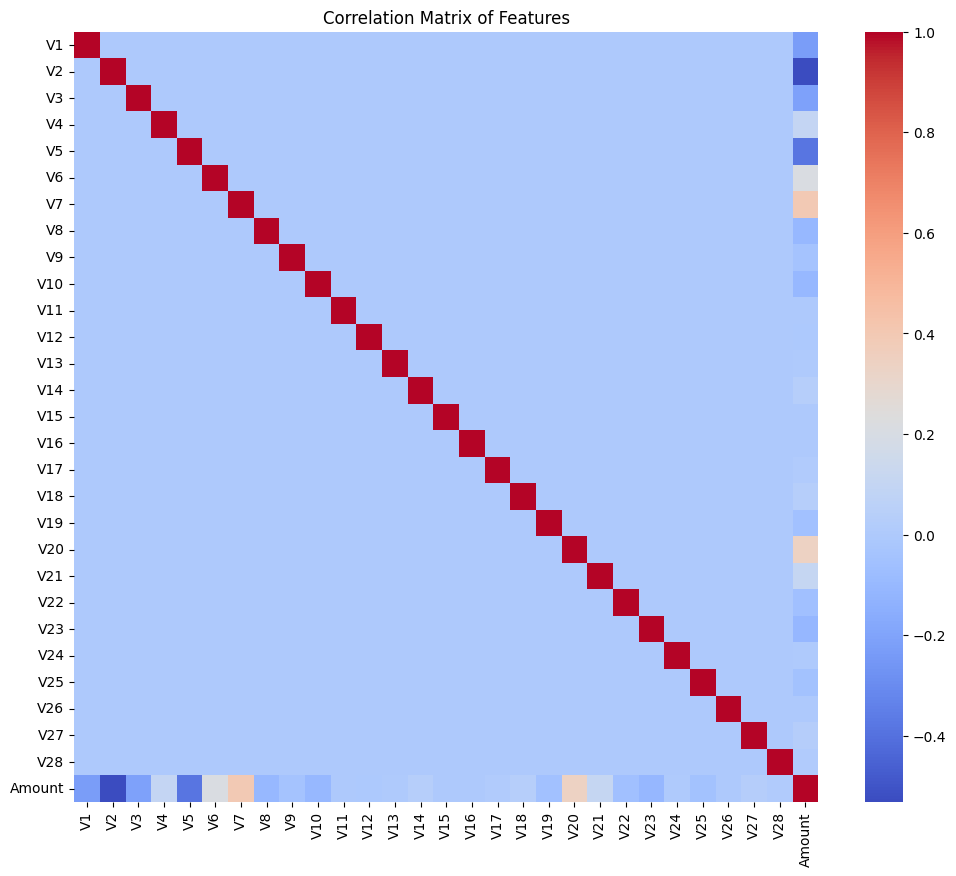

In [ ]:
# Select columns starting with 'V' and the 'Amount' column
v_columns = [col for col in df.columns if col.startswith('V')]
selected_columns = v_columns + ['Amount']

# Compute the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Features')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The distribution of transaction amounts is heavily skewed towards smaller values, with a long tail extending to larger amounts. The box plot highlights a large number of outliers with higher transaction amounts.
*   The proportion of fraudulent transactions in the dataset is very low, at approximately 0.17%.
*   Box plots and summary statistics show notable differences in the distributions of 'Amount' and several 'V' features (e.g., V1, V2, V3, V4, V5) between fraudulent and non-fraudulent transactions. Fraudulent transactions tend to have higher mean and median 'Amount' and distinct shifts in the distributions of the 'V' features.
*   The heatmap of the correlation matrix for the 'V' columns and 'Amount' reveals varying degrees of correlation between these features, which could be useful for feature selection or understanding relationships.

### Insights or Next Steps

*   The significant class imbalance needs to be addressed in any future modeling efforts (e.g., using techniques like oversampling, undersampling, or specialized algorithms).
*   Features like 'Amount' and several 'V' features appear to be potential indicators of fraudulent activity and warrant further investigation and potential use in a fraud detection model.
